In [1]:
from baselines.common import plot_util as pu

If you want to average results for multiple seeds, LOG_DIRS must contain subfolders in the following format: ```<name_exp0>-0```, ```<name_exp0>-1```, ```<name_exp1>-0```, ```<name_exp1>-1```. Where names correspond to experiments you want to compare separated with random seeds by dash.

In [2]:
import json
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
def clip_and_rm(input_list, maximum=1, gamma=0.9):
    output_list = []
    ma = min(input_list[0], maximum)
    for element in input_list:
        element = min(element, maximum)
        ma = gamma * ma + (1-gamma) * element
        output_list.append(ma)
    return output_list

In [4]:
def plot_reward(log_dirs):
    print(phonebook[log_dirs])
    print(log_dirs)
    results = pu.load_results(log_dirs)
    pu.plot_results(results, average_group=True, split_fn=lambda _: '', shaded_std=False)

def plot_losses(log_dirs, eval_interval=500):
    print(phonebook[log_dirs])
    if os.path.isfile(os.path.join(log_dirs, "eval_rewards.json")):
        eval_rewards = json.load(open(os.path.join(log_dirs, "eval_rewards.json"), "r"))
        figure_to_plot = 2 + len(eval_rewards)
    else:
        figure_to_plot=2
    figure(num=None, figsize=(12, 6*figure_to_plot), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(figure_to_plot, 1, 1)
    value_losses = json.load(open(os.path.join(log_dirs, "value_losses.json"), "r"))
    plt.plot(clip_and_rm(value_losses))
    plt.xlabel("updates")
    plt.ylabel("value loss")
    plt.subplot(figure_to_plot, 1, 2)
    action_losses = json.load(open(os.path.join(log_dirs, "action_losses.json"), "r"))
    plt.plot(clip_and_rm(action_losses))
    plt.xlabel("updates")
    plt.ylabel("action loss")
    if figure_to_plot > 2:
        for eval_reward_case in range(len(eval_rewards)):
            plt.subplot(figure_to_plot, 1, eval_reward_case+3)
            plt.plot([ele*eval_interval for ele in list(range(len(eval_rewards[list(eval_rewards.keys())[eval_reward_case]])))], 
                     eval_rewards[list(eval_rewards.keys())[eval_reward_case]],
                    label = list(eval_rewards.keys())[eval_reward_case])
            plt.xlabel("updates")
            plt.ylabel("eval success rate")
            plt.title(list(eval_rewards.keys())[eval_reward_case])
            plt.legend()

def plot_all_in_phonebook(phonebook):
    for log_dirs in phonebook:
        plot_reward(dir_logs)

In [5]:
def dir_phonebook(log_dirs):
    phonebook = dict()
    for dir_name in os.listdir(log_dirs):
        if os.path.isdir(os.path.join(log_dirs, dir_name)) and not dir_name.startswith(".") \
            and dir_name > "2019_11_24_23_55":
            env_config = json.load(open(os.path.join(log_dirs, dir_name, "env_config.json")))
            title = ""
            if env_config["pretrain_dir"]:
                title += "pretrain_"
            else:
                title += "scratch_"

            title += env_config["obs_mode"] + "_"

            if env_config["fix_policy"]:
                title += "fix_policy_"

            title += "lr_{}_".format(env_config["lr"])
            title += "trained_on_{}".format("_and_".join(env_config["train_dirs"]))

            phonebook[os.path.join(log_dirs, dir_name)] = title
    return phonebook

In [6]:
phonebook = dir_phonebook("/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online")
phonebook

{'/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_43_300683': 'pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=1_l=1_and_k=1_l=3_and_k=2_l=3',
 '/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_724212': 'pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=3_l=7',
 '/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_41_541105': 'pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=1_l=1_and_k=2_l=3',
 '/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_853515': 'pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=5_l=9',
 '/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_43_292736': 'pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=5_l=9',
 '/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_747949': 'pretrain_geometric_fix_policy_lr_1

In [7]:
len(phonebook)

16

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=1_l=1_and_k=1_l=3_and_k=2_l=3
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_43_300683


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


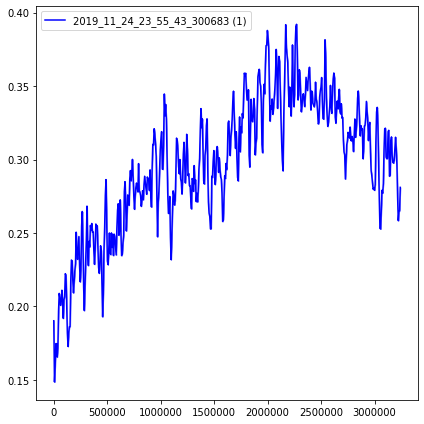

In [8]:
dir_logs = list(phonebook.keys())[0]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=1_l=1_and_k=1_l=3_and_k=2_l=3


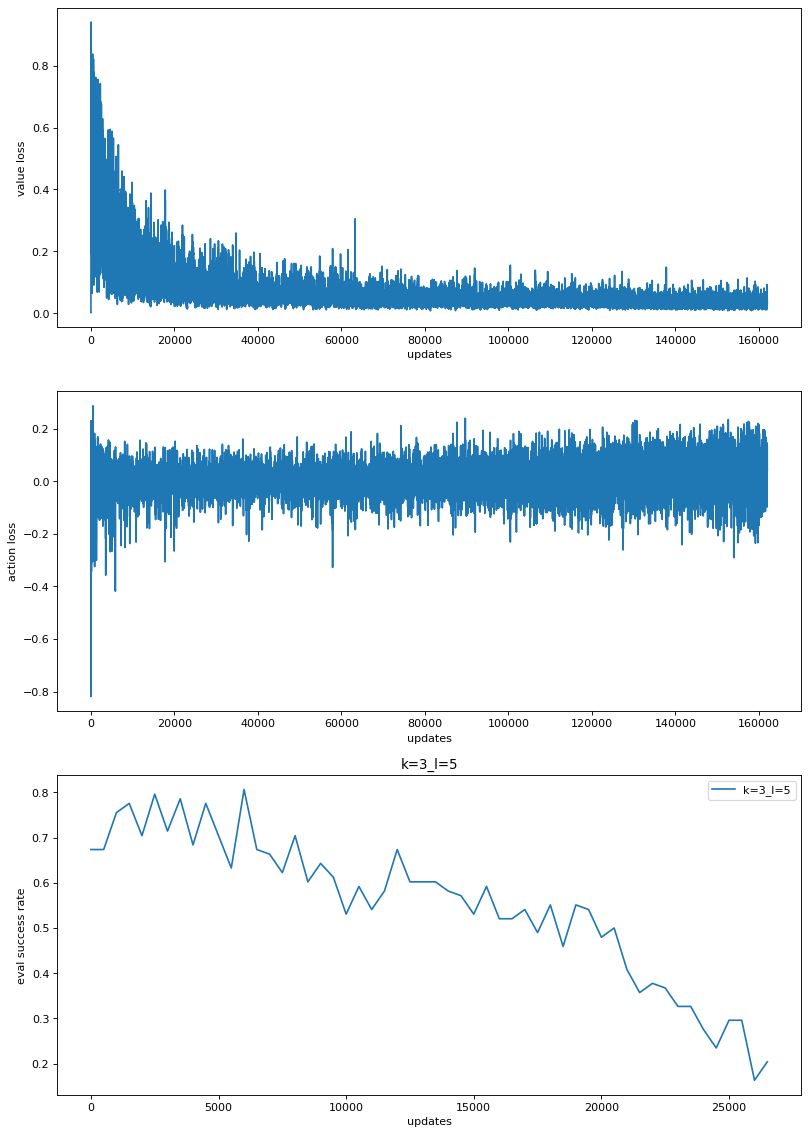

In [9]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=3_l=7
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_724212


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


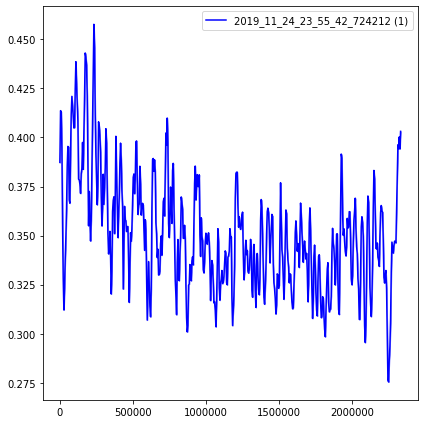

In [10]:
dir_logs = list(phonebook.keys())[1]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=3_l=7


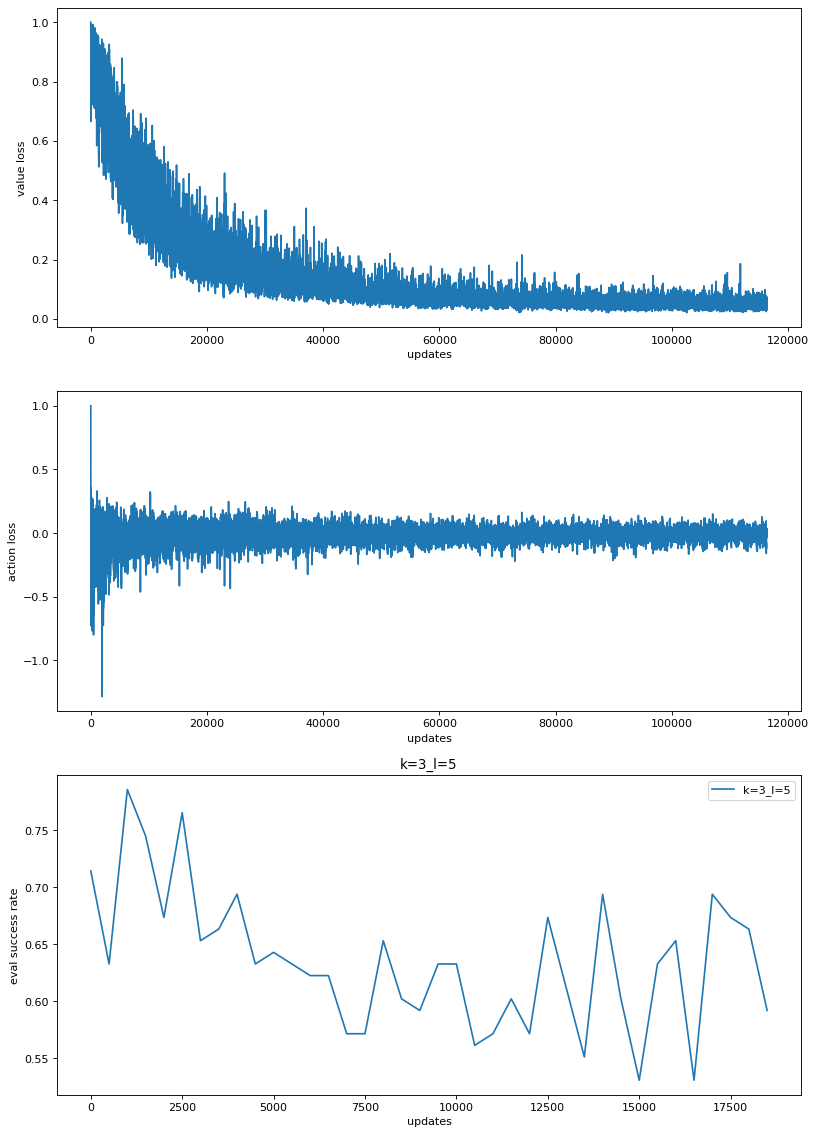

In [11]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=1_l=1_and_k=2_l=3
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_41_541105


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


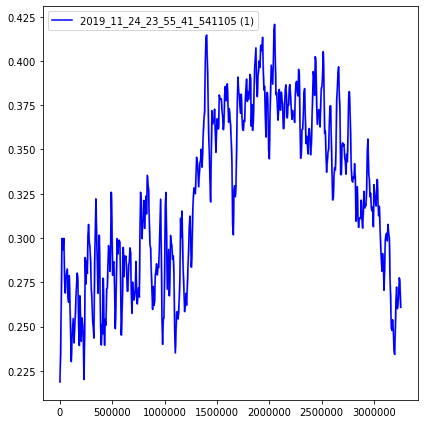

In [12]:
dir_logs = list(phonebook.keys())[2]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=1_l=1_and_k=2_l=3


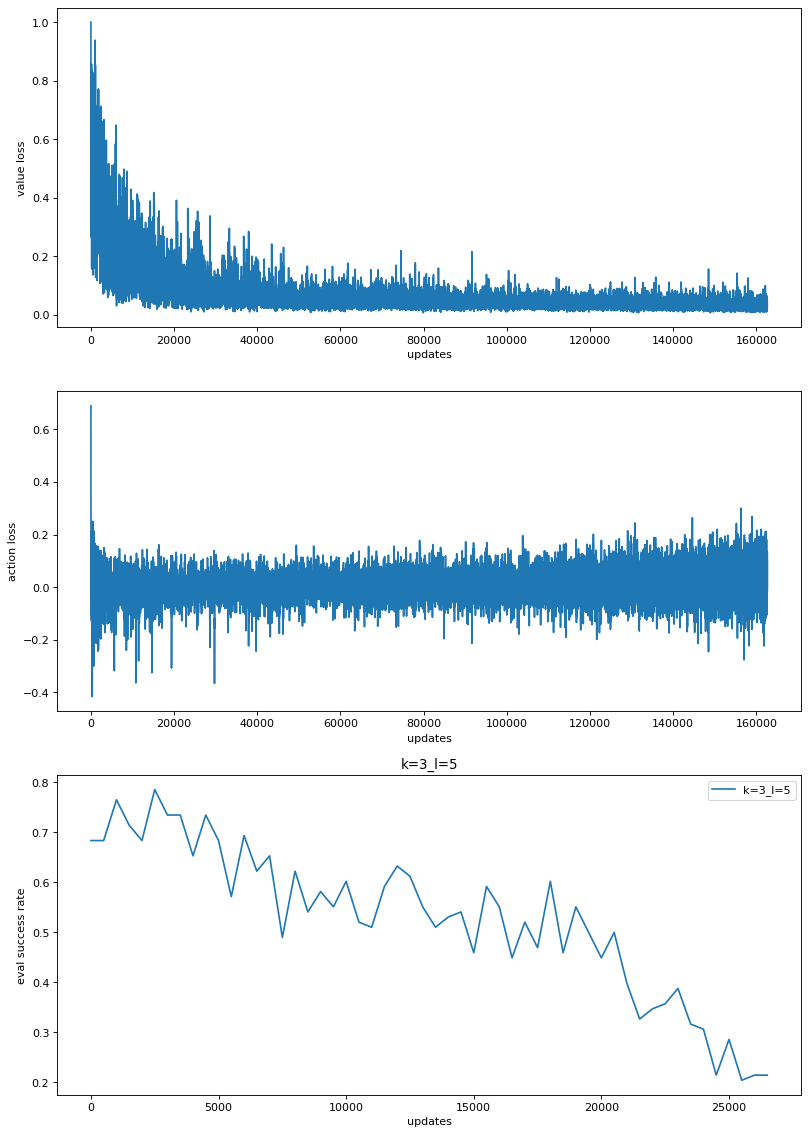

In [13]:
plot_losses(dir_logs)

In [14]:
dir_logs = list(phonebook.keys())[3]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=5_l=9
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_853515


AssertionError: 

In [ ]:
plot_losses(dir_logs)

In [15]:
dir_logs = list(phonebook.keys())[4]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=5_l=9
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_43_292736


AssertionError: 

In [ ]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=1_l=1_and_k=1_l=3_and_k=2_l=3_and_k=2_l=5
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_747949


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


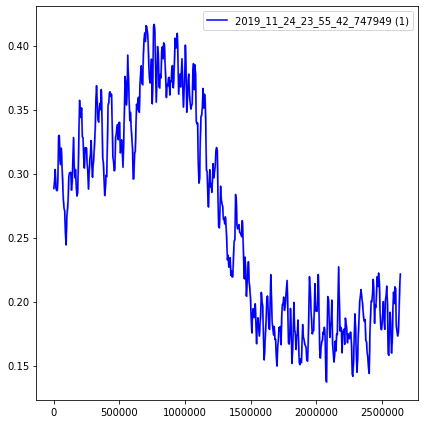

In [16]:
dir_logs = list(phonebook.keys())[5]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=1_l=1_and_k=1_l=3_and_k=2_l=3_and_k=2_l=5


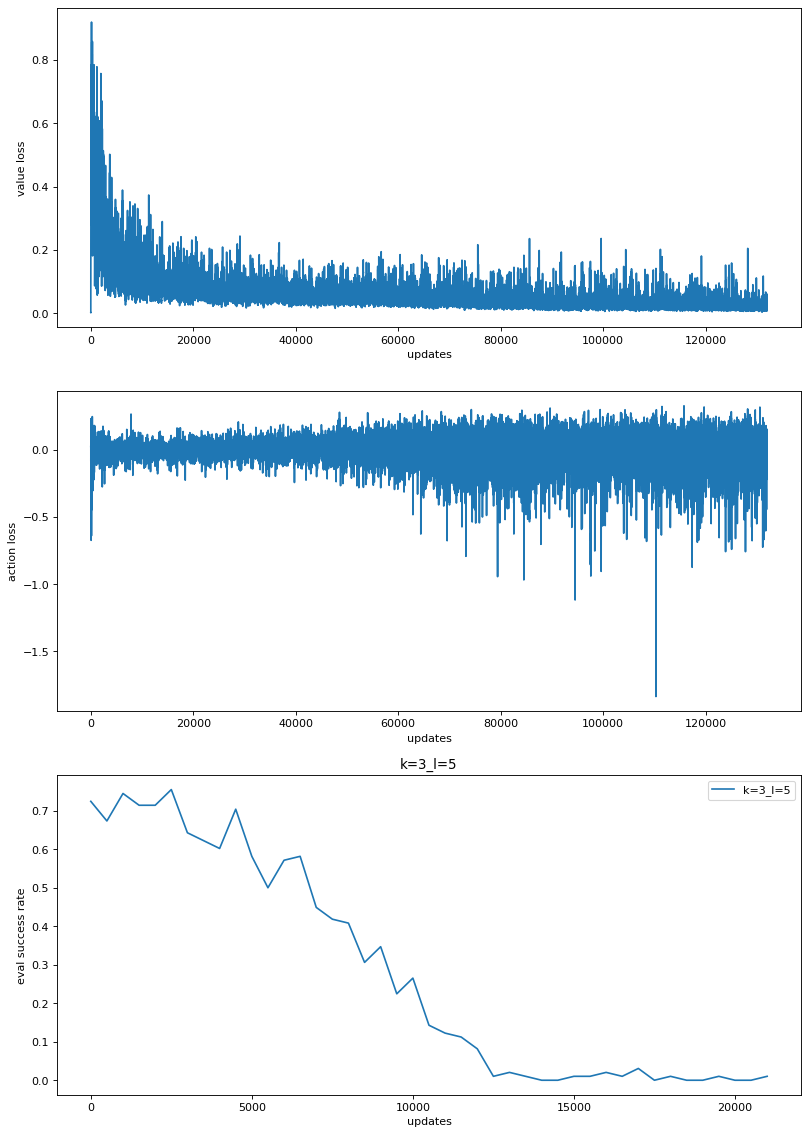

In [17]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=3_l=7
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_752524


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


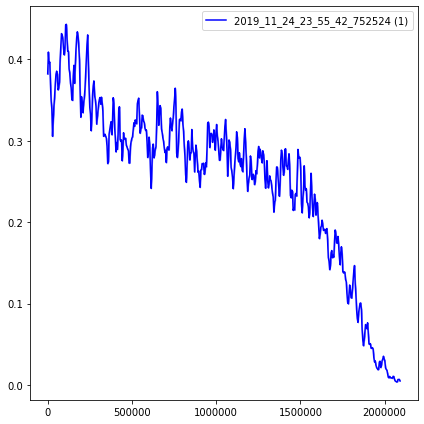

In [18]:
dir_logs = list(phonebook.keys())[6]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=3_l=7


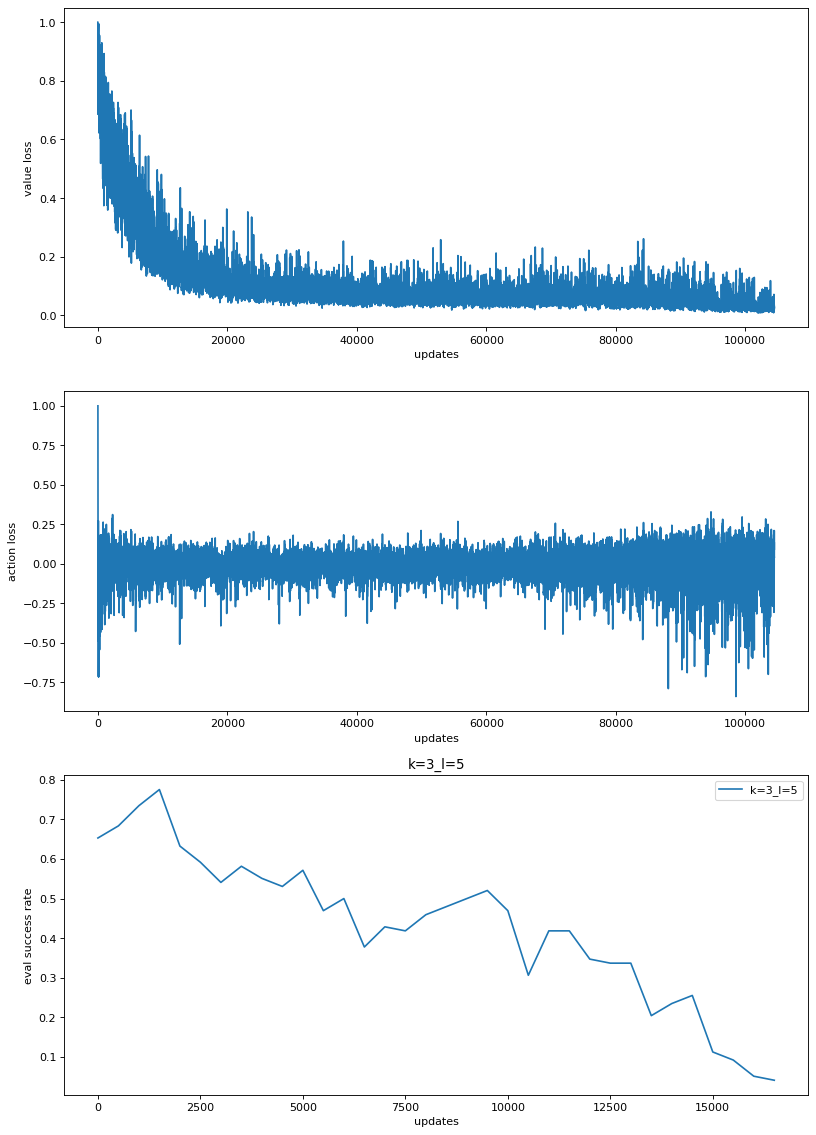

In [19]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_515486


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


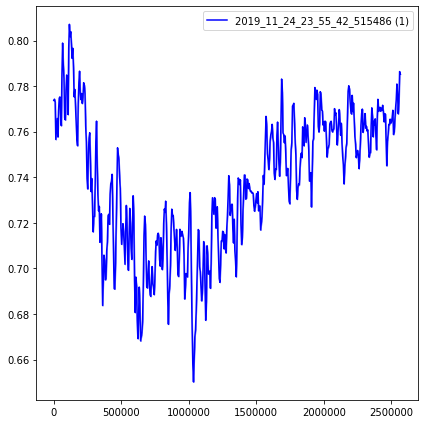

In [20]:
dir_logs = list(phonebook.keys())[7]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5


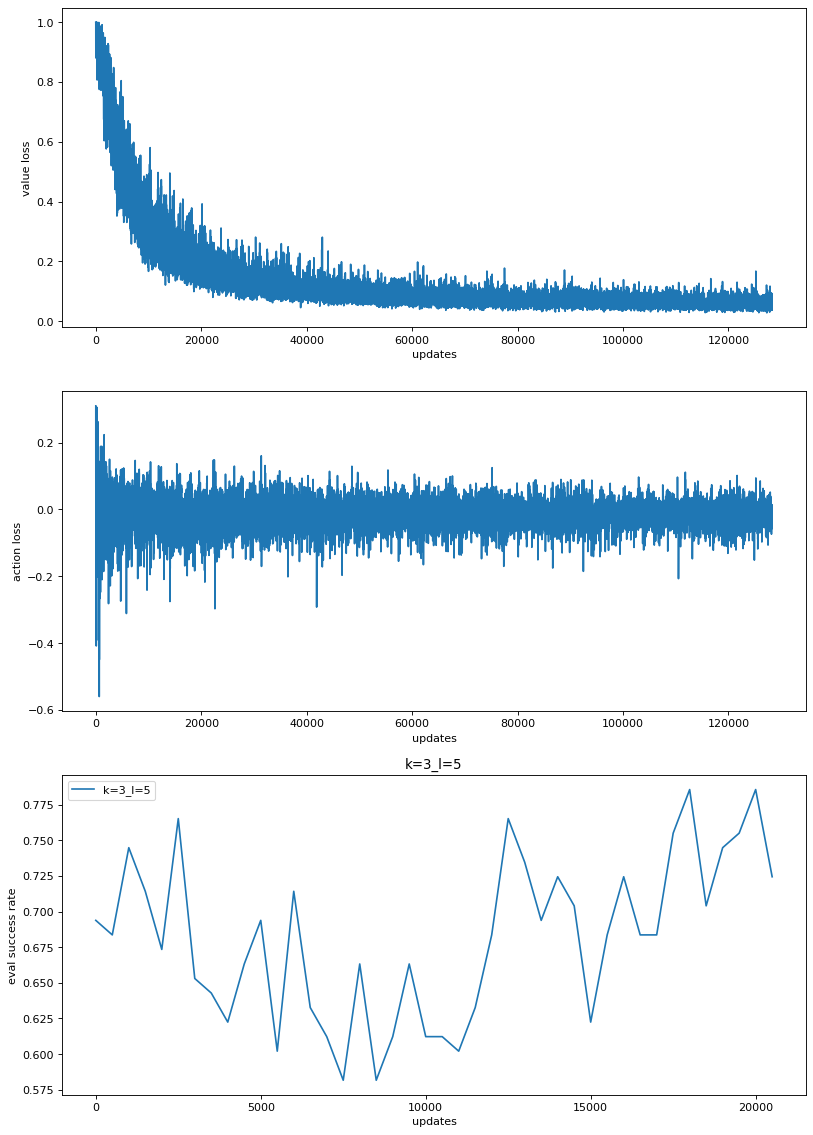

In [21]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=1_l=1_and_k=1_l=3_and_k=2_l=3
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_634277


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


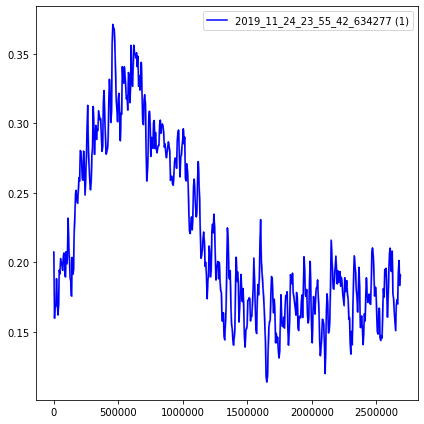

In [22]:
dir_logs = list(phonebook.keys())[8]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=1_l=1_and_k=1_l=3_and_k=2_l=3


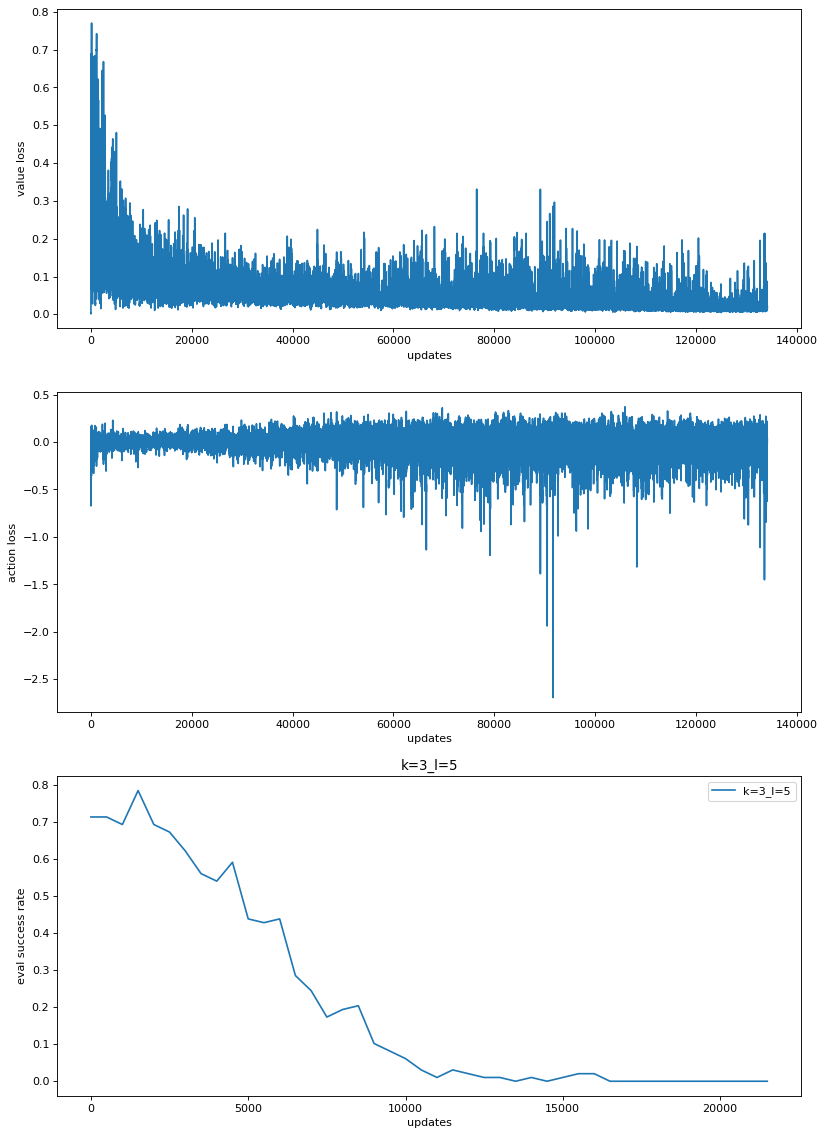

In [23]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=1_l=1_and_k=1_l=3_and_k=2_l=3_and_k=2_l=5
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_747472


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


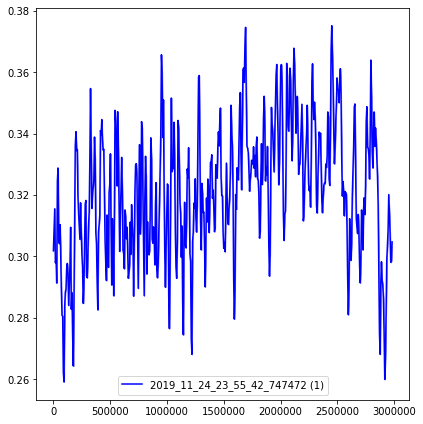

In [24]:
dir_logs = list(phonebook.keys())[9]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=1_l=1_and_k=1_l=3_and_k=2_l=3_and_k=2_l=5


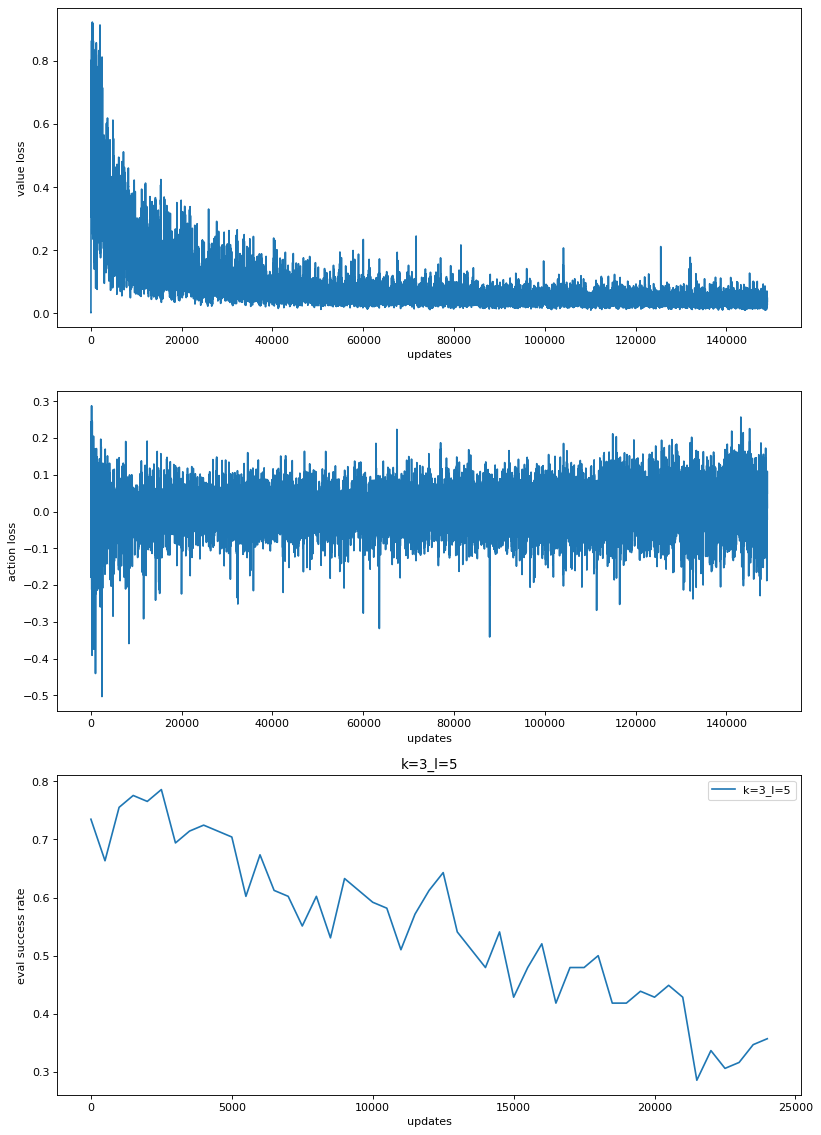

In [25]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=1_l=1_and_k=2_l=3
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_43_299843


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


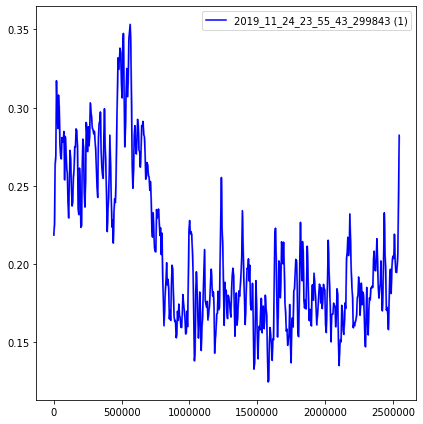

In [26]:
dir_logs = list(phonebook.keys())[10]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=1_l=1_and_k=2_l=3


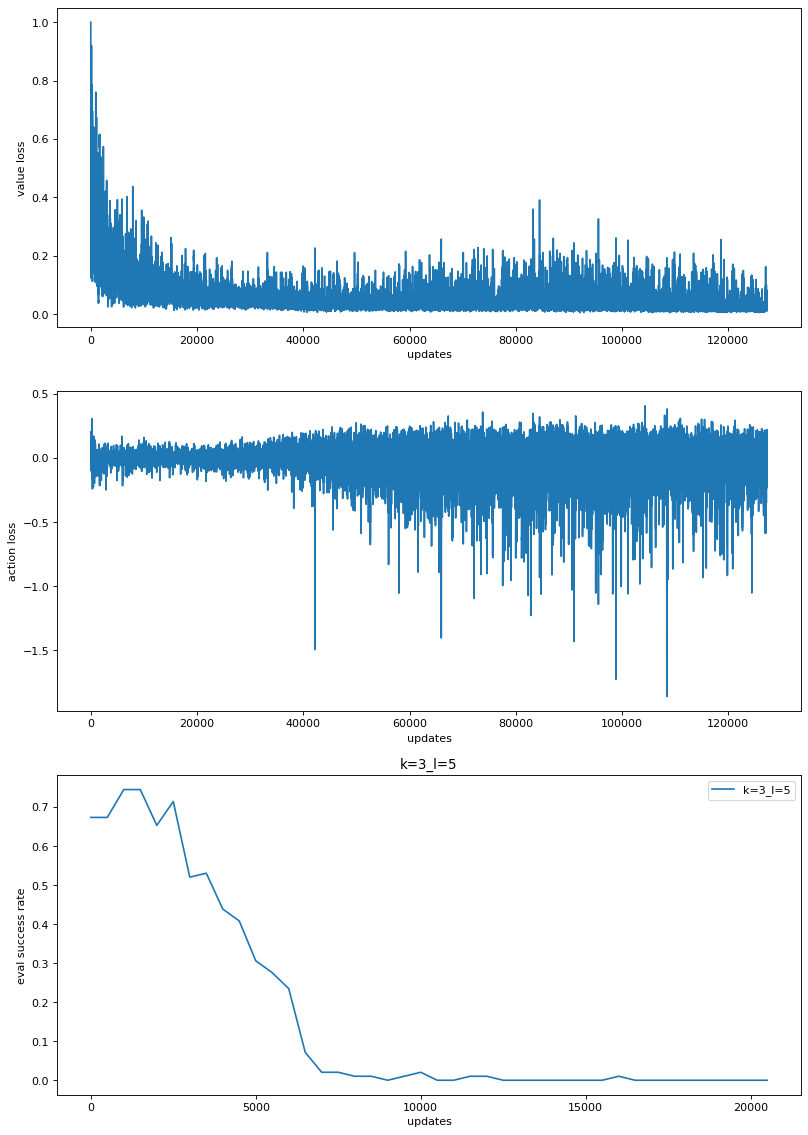

In [27]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=4_l=7
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_452769


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


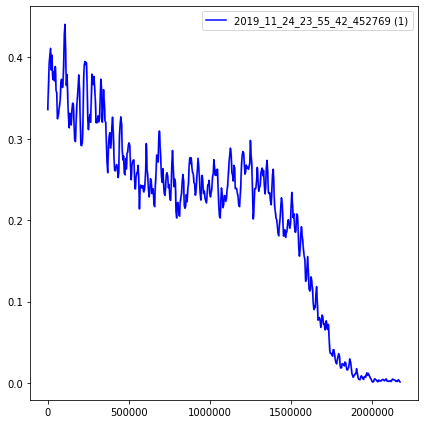

In [28]:
dir_logs = list(phonebook.keys())[11]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5_and_k=4_l=7


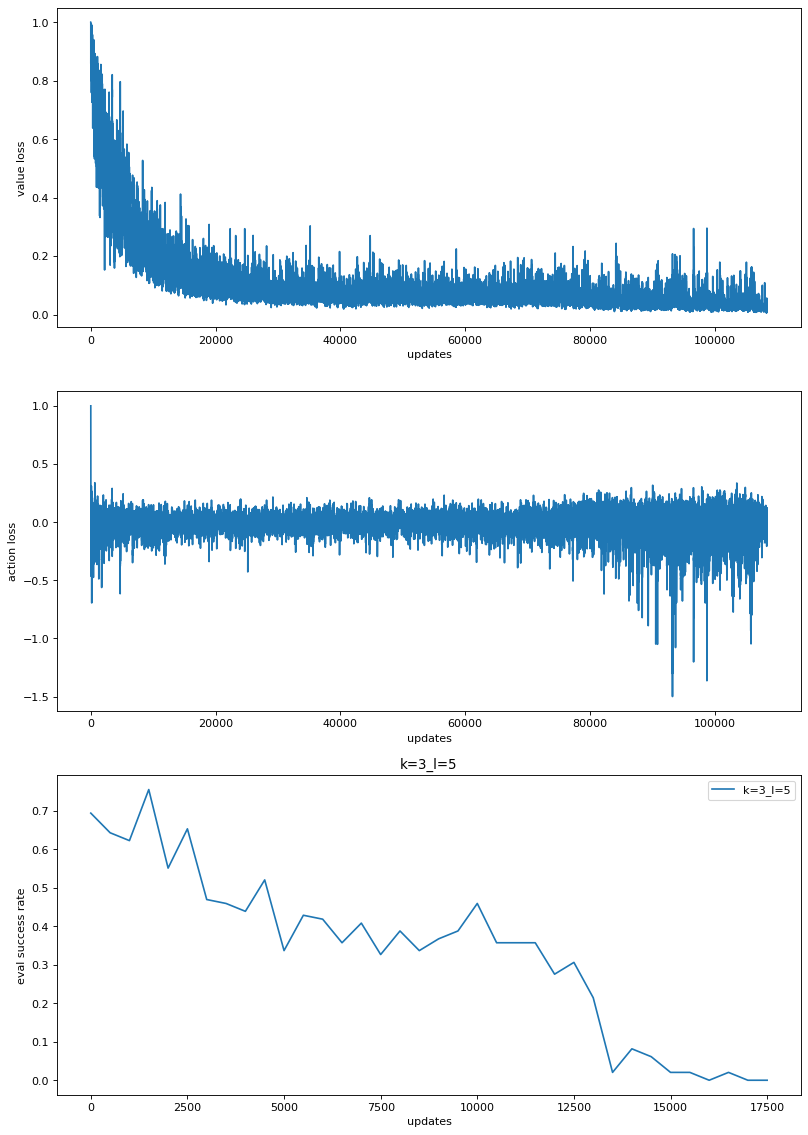

In [29]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=2_l=5_and_k=3_l=5
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_42_809651


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


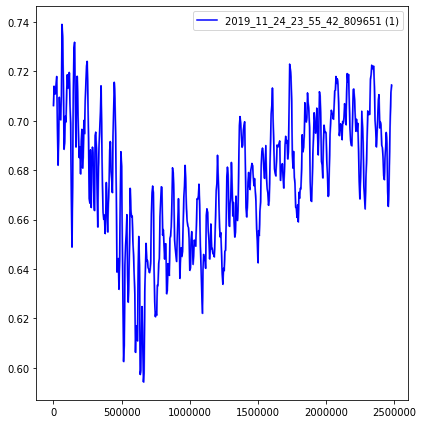

In [30]:
dir_logs = list(phonebook.keys())[12]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=2_l=5_and_k=3_l=5


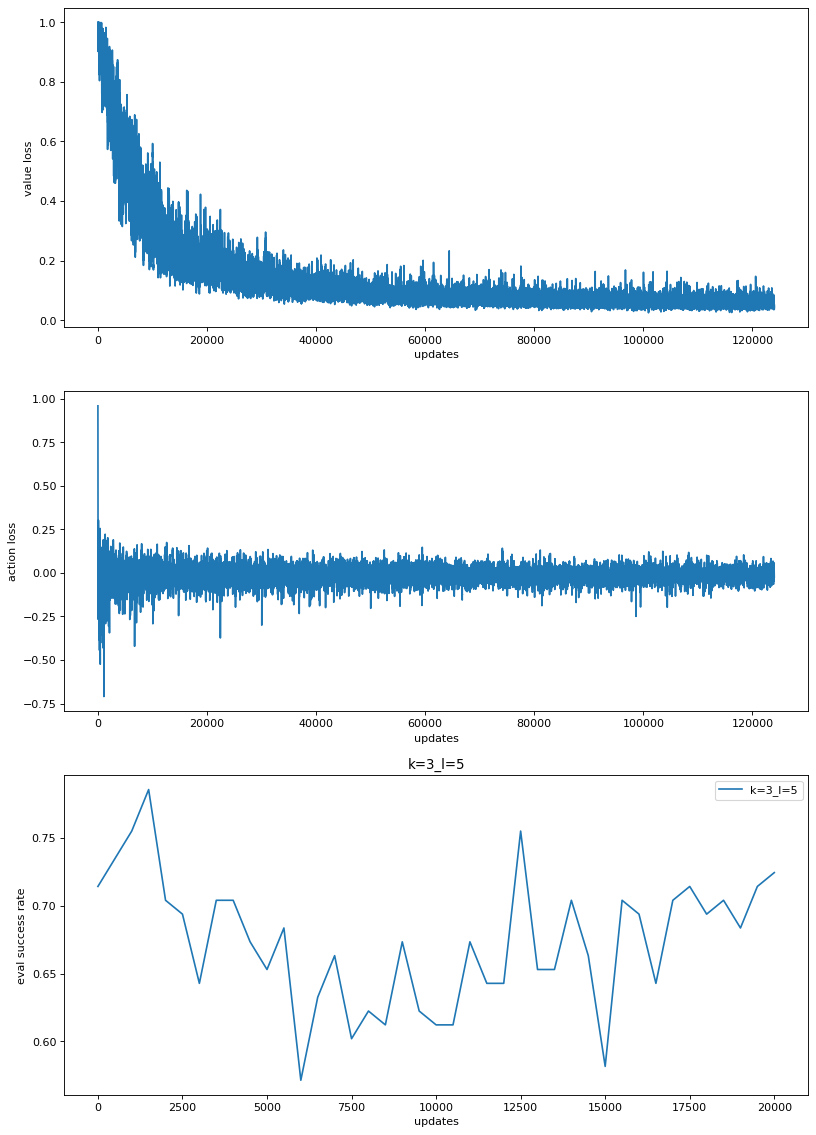

In [31]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=2_l=5_and_k=3_l=5
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_40_415964


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


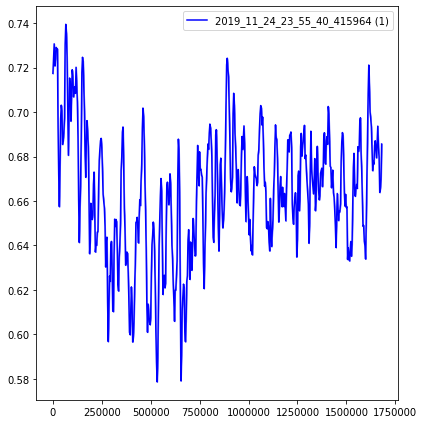

In [32]:
dir_logs = list(phonebook.keys())[13]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=2_l=5_and_k=3_l=5


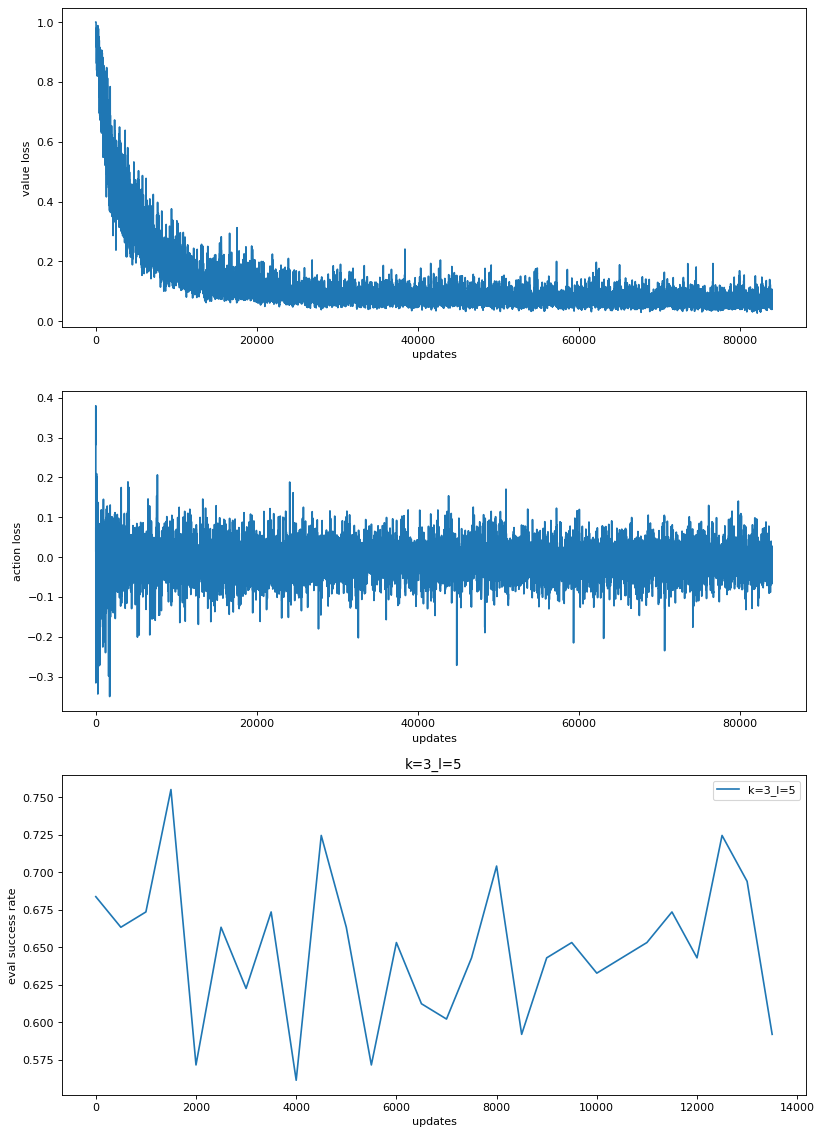

In [33]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_41_541416


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


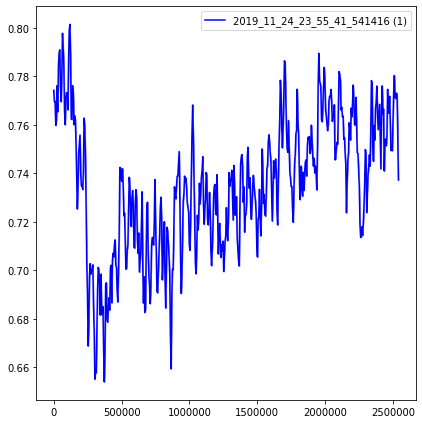

In [34]:
dir_logs = list(phonebook.keys())[14]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_1e-05_trained_on_k=3_l=5


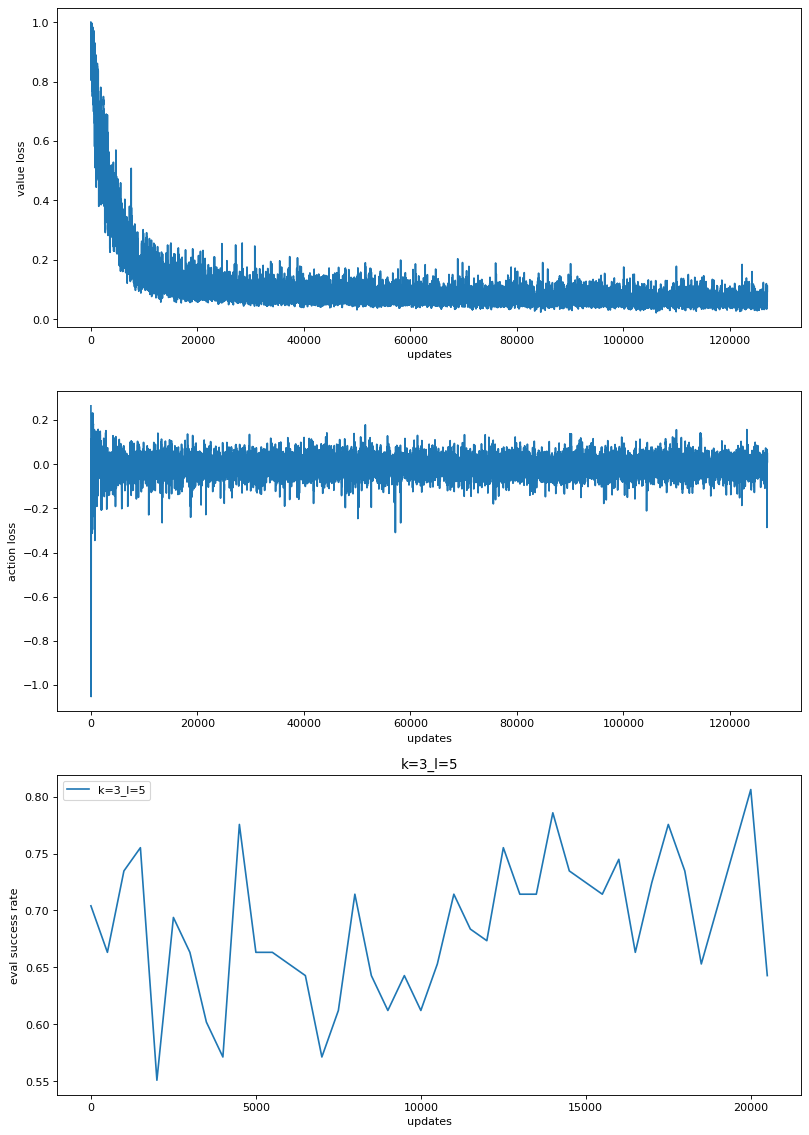

In [35]:
plot_losses(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=4_l=7
/scratch/hdd001/home/ajiang/ywu/ineqResultsEasy/rl_back_online/2019_11_24_23_55_43_373475


/scratch/ssd001/home/ajiang/pkgs/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


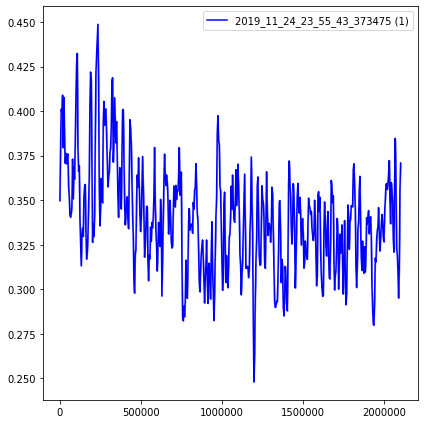

In [36]:
dir_logs = list(phonebook.keys())[15]
plot_reward(dir_logs)

pretrain_geometric_fix_policy_lr_3e-06_trained_on_k=3_l=5_and_k=4_l=7


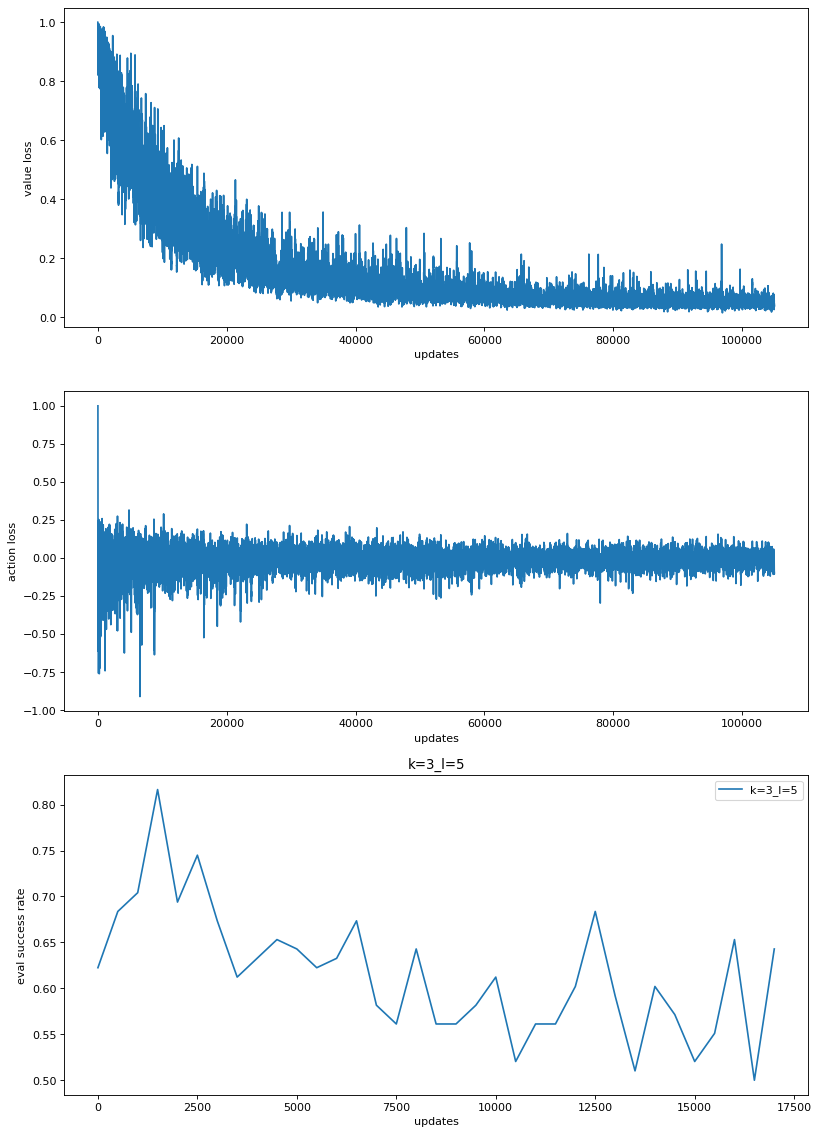

In [37]:
plot_losses(dir_logs)